# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

Rank 481


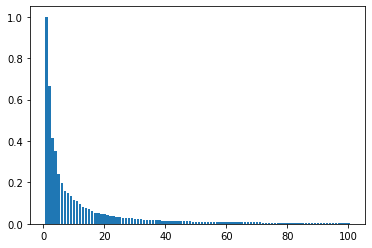

In [2]:
# Samples corresponding to the last digit of your roll number (plot a)

import numpy.linalg as la

result = np.where(train_labels == 0)
D = train_data[result]

# mean1 = np.mean(D,0)
# sig = np.cov(np.transpose(D-mean1))
sig = np.cov(np.transpose(D))
eigen_value,eigen_vector= la.eig(sig)
print("Rank", np.abs(eigen_value[np.abs(eigen_value)>0]).shape[0])
normalize= max(eigen_value)-min(eigen_value)
eigen_value= (eigen_value - min(eigen_value) )/normalize

x1=np.arange(1,101)
y1=np.absolute(eigen_value[0:100])
a=plt.bar(x1,y1)
# print(min(eigen_value))


Rank 432


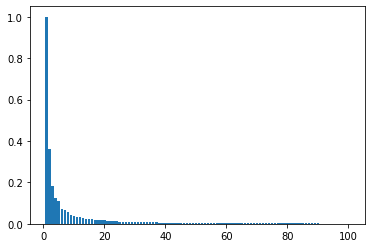

In [3]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)

result = np.where(train_labels == 1)
D = train_data[result]

# mean1 = np.mean(D,0)
# sig = np.cov(np.transpose(D-mean1))
sig = np.cov(np.transpose(D))

eigen_value,eigen_vector= la.eig(sig)
print("Rank", np.abs(eigen_value[np.abs(eigen_value)>0]).shape[0])
normalize= max(eigen_value)-min(eigen_value)
eigen_value=(eigen_value - min(eigen_value) )/normalize

x1=np.arange(1,101)
y1=np.absolute(eigen_value[0:100])
a=plt.bar(x1,y1)


Rank: 667


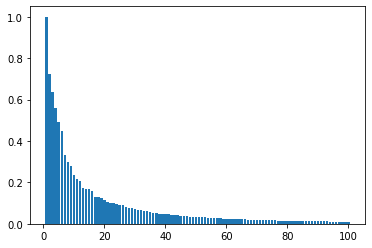

In [4]:
# All training data (plot c)

# mean1 = np.mean(train_data,0)
# sig = np.cov(np.transpose(train_data-mean1))

sig = np.cov(np.transpose(train_data))
eigen_value,eigen_vector= la.eig(sig)
print("Rank:", np.abs(eigen_value[np.abs(eigen_value)>0]).shape[0])

normalize= max(eigen_value)-min(eigen_value)
eigen_value=(eigen_value - min(eigen_value) )/normalize

x1=np.arange(1,101)
y1=np.absolute(eigen_value[0:100])
a=plt.bar(x1,y1)


Rank: 635


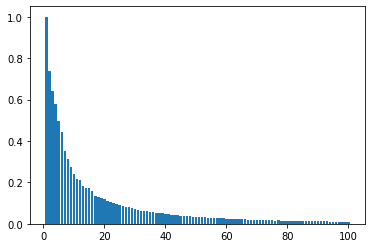

In [5]:
# Randomly selected 50% of the training data (plot d)

a = np.arange(6000)
np.random.shuffle(a)
D = train_data[a[:3000]]

# mean1 = np.mean(D,0)
# sig = np.cov(np.transpose(D-mean1))
sig = np.cov(np.transpose(D))
eigen_value,eigen_vector= la.eig(sig)
print("Rank:",np.abs(eigen_value[np.abs(eigen_value)>0]).shape[0])

normalize= max(eigen_value)-min(eigen_value)
eigen_value=(eigen_value - min(eigen_value) )/normalize

x1=np.arange(1,101)
y1=np.absolute(eigen_value[0:100])
a=plt.bar(x1,y1)


### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?


Your answers here (double click to edit)
1. The plots for class-0 and class-1 are different because the character 0 and 1 has significantly differnrt from each other.
2. The plots from class-1 and all classes (on all data) is significantly different because the variance $\Sigma$ of the matrix is larges as compared to the variance of images of only one class alone.
3. Approximate matrix ranks are: <br />
a) 481 <br />
b) 432 <br />
c) 667 <br />
d) 645(on average)


### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
Your answers here (double click to edit)
1. $2^{784}$
2. Percentage of MNIST data = Total number of samples available/ALl possible images<br />
= $7000/{2^{784}}*100\%$
3. If all the data is used and covariance is computed we get: <br/> $\Sigma = cI, c\in\mathbb{R}$.<br /> The covariance of i-th feature and j-th feature are not at all correlated beacuse all possible combination are available and hence the covariance is 0, i.e, $\sigma_{i,j}$ = 0, $\forall i\neq j$ and $\sigma_{i,i}$ = c $> 0, \forall i$. So the matrix will have 784 non-zero eigen value 

---
---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
Analytical answer here (double click to edit)

### Intuition
Since $\Sigma$ is a semi positive definte matrix, so multiplying it with any norm preserving matrix will not change its eigen values. 

### Proof
Given :<br /> 
Data matrix: $D_{600x784}$ 
An orthogonal matrix: $A_{784x784}$<br /> 
Proof:<br /> 
$D_{600x784}$ x $A_{784x784}$ can be thought as the rotation of rows (features of images all together) in $\mathbb{R}^{784}$. Hence the mean $\mu$ will also be transformed similarly.
We know,<br /> 
$\Sigma$ = $(D-\mu)^T(D-\mu) = Q^{T}{\Lambda}Q$, which is the eigen decomposition of $\Sigma$.
Now,<br />  
$D^{\prime} = DA$ and $\mu^{\prime} = {\mu}A$. <br /> 
But we know that <br /> 

$\Sigma^{\prime} = (D^{\prime}-{\mu}^{\prime})^T(D^{\prime}-{\mu}^{\prime})$.

$\implies \Sigma^{\prime} = (DA-{\mu}A)^T(DA-{\mu}A)$

$\implies \Sigma^{\prime} = A^T(D-{\mu})^T(D-\mu)A$

We know, $A^{-1} = A^T$ (Since, $A$ is orthogonal and square)

and $ \Sigma = (D-{\mu})^T(D-\mu)= Q^{T}{\Lambda}Q$

$\implies \Sigma^{\prime} = A^T{\Sigma}A $

$\implies \Sigma^{\prime} = A^TQ^{T}{\Lambda}QA$


$\implies \Sigma^{\prime} = (QA)^{T}{\Lambda}QA$, where QA  is again an orthogonal matrix.<br />  
We can see it clearly that eigenvalues are preserved, but eigenvectors are multiplied by A 


### Therefore there will be no change in the eigenspecturm of the covariance matrix.
---

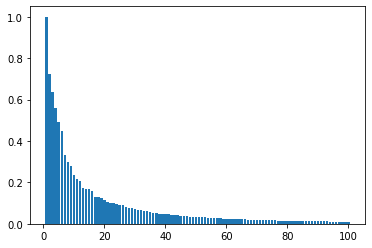

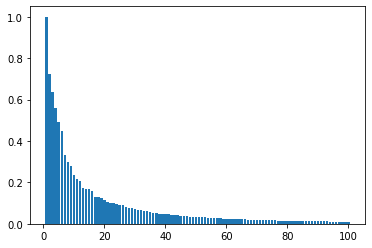

In [6]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.

# code goes here

# from scipy.stats import ortho_group

# mean1 = np.mean(train_data,0)
# sig = np.cov(np.transpose(train_data-mean1))
sig = np.cov(np.transpose(train_data))
eigen_value,eigen_vector= la.eig(sig)

normalize= max(eigen_value)-min(eigen_value)
eigen_value=(eigen_value - min(eigen_value) )/normalize

x1=np.arange(1,101)
y1=np.absolute(eigen_value[0:100])
a=plt.bar(x1,y1)
plt.show()

U,s1,v1 = la.svd(np.random.rand(784,784))
# X = U.dot(U.T)
# print(X)
# A= np.array(ortho_group.rvs(dim=784))
D= train_data.dot(U)
# mean1 = np.mean(D,0)
# sig1 = np.cov(np.transpose(D-mean1))
sig1 = np.cov(np.transpose(D))


eigen_value1,eigen_vector1= la.eig(sig1)

normalize1= max(eigen_value1)-min(eigen_value1)
eigen_value1=(eigen_value1 - min(eigen_value1) )/normalize1
x2=np.arange(1,101)
y2=np.absolute(eigen_value[0:100])
b=plt.bar(x2,y2)
plt.show()



### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
Your answer here (double click to edit)

Directly from the property of rank of a matrix AB,that is $rank(AB)\leq min(rank(A),rank(B))$ <br /> 

So $rank(DA) = rank(A)$, where $rank(A)$ = 1 or 2.

Thus, there is only one (or two) non-zero singular value of DA and hence covariance matrix $\Sigma$ will have only one (or two) non-zero eigenvalue.

Thus $\Sigma$ will also be of rank 1 or 2.

---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

(784, 2)


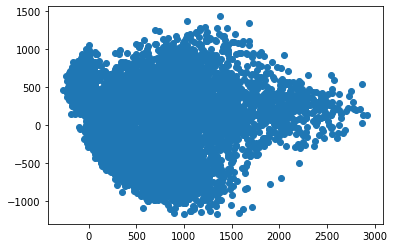

In [7]:
# Plotting code here

sig = np.cov(np.transpose(train_data))
eigen_value,eigen_vector= la.eig(sig)

eigen_vector=eigen_vector[:,:].real
PCA=eigen_vector[:,:2]
print(PCA.shape)
Projection = train_data.dot(PCA) 

a=plt.scatter(Projection[:,0],Projection[:,1])



## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [8]:
# Print accuracy on the test set using MLE


def pdet_fun(A):
    eigen_values, eigen_vectors = la.eig(A)
    return np.product(eigen_values[np.where(np.absolute(eigen_values) > 10000)[0]].real)
    
def maha_dist(trd,ted):
    mean1= np.mean(trd,0)
    sigma= np.cov(trd.T)
    pdet=pdet_fun(sigma)
    sigma_inv= la.pinv(sigma)
    
    shifted_matrix=ted-mean1
#     print(sigma.shape)
#     print(shifted_matrix.shape)
    maha_distance = shifted_matrix.dot(sigma_inv.dot(shifted_matrix.T))
    maha_distance= -0.5*maha_distance - 0.5*np.log(pdet)
#     print(maha_distance.shape,trd.shape,ted.shape)
    return np.diagonal(maha_distance)

x = np.zeros((10, 1000))
for i in range(10):
    x[i] = maha_dist(train_data[np.where(train_labels == i)],test_data)

res=np.argmax(x,0)
# print(res)
comp=test_labels.astype(int)
comp= comp-res
[result] = np.where(comp == 0)
print(len(result)/10,"%")




74.8 %


In [9]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)
# assuming uniform prior ie. 0.1 because number of element of each class in sample is 600 and 
# total number of 6000

def pdet_fun(A):
    eigen_values, eigen_vectors = la.eig(A)
    return np.product(eigen_values[np.where(np.absolute(eigen_values) > 10000)[0]].real)
    
def maha_dist(trd,ted):
    mean1= np.mean(trd,0)
    sigma= np.cov(trd.T)
    pdet=pdet_fun(sigma)
    sigma_inv= la.pinv(sigma)
    
    shifted_matrix=ted-mean1
#     print(sigma.shape)
#     print(shifted_matrix.shape)
    maha_distance = shifted_matrix.dot(sigma_inv.dot(shifted_matrix.T))
    maha_distance= -0.5*maha_distance - 0.5*np.log(pdet) - np.log(10)
#     print(maha_distance.shape,trd.shape,ted.shape)
    return np.diagonal(maha_distance)

x = np.zeros((10, 1000))
for i in range(10):
    x[i] = maha_dist(train_data[np.where(train_labels == i)],test_data)

res=np.argmax(x,0)
# print(res)
comp=test_labels.astype(int)
comp= comp-res
[result] = np.where(comp == 0)
print(len(result)/10,"%")


74.8 %


In [10]:
# Print accuracy using Bayesian pairwise majority voting method

def maha_dist(ted,mean,sigma):
#     print(sigma.shape)
    sigma_inv= la.pinv(sigma)
    shifted_matrix=ted-mean
    maha_distance = shifted_matrix.dot(sigma_inv.dot(shifted_matrix.T))
    return np.diagonal(maha_distance)

x = np.zeros((2, 1000))
cnt = np.zeros((1000,10))
for i in range(9):
    D1=train_data[np.where(train_labels == i)]
    sigma1= np.cov(D1.T)
    mean1= np.mean(D1,0)
    for j in range(i+1,10):
        D2=train_data[np.where(train_labels == j)]
        sigma2= np.cov(D2.T)
        sigma=(sigma1+sigma2)/2.0
        mean2= np.mean(D2,0)
#         print(sigma.shape)
        x[0] = maha_dist(test_data,mean1,sigma)
        x[1] = maha_dist(test_data,mean2,sigma)
#         res=np.argmin(x,0)
        for k in range(1000):
            if x[0,k] < x[1,k]:
                cnt[k,i]=cnt[k,i]+1
            else:
                cnt[k,j]=cnt[k,j]+1

final_res=np.argmax(cnt,1)
# print(final_res)

comp=test_labels.astype(int)
comp= comp-final_res
# print(comp)
[result] = np.where(comp == 0)
print(len(result)/10,"%")

83.7 %


In [11]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
def euclid_dist(ted,mean):
#     print(sigma.shape)
    shifted_matrix=ted-mean
    e_distance = shifted_matrix.dot(shifted_matrix.T)
    return np.diagonal(e_distance)

x = np.zeros((2, 1000))
cnt = np.zeros((1000,10))
for i in range(9):
    D1=train_data[np.where(train_labels == i)]
    mean1= np.mean(D1,0)
    for j in range(i+1,10):
        D2=train_data[np.where(train_labels == j)]
        mean2= np.mean(D2,0)
#         print(sigma.shape)
        x[0] = euclid_dist(test_data,mean1)
        x[1] = euclid_dist(test_data,mean2)
#         res=np.argmin(x,0)
        for k in range(1000):
            if x[0,k] < x[1,k]:
                cnt[k,i]=cnt[k,i]+1
            else:
                cnt[k,j]=cnt[k,j]+1

final_res=np.argmax(cnt,1)
# print(final_res)

comp=test_labels.astype(int)
comp= comp-final_res
# print(comp)
[result] = np.where(comp == 0)
print(len(result)/10,"%")

77.0 %


### 1.3.3 Question 4
Compare performances and salient observations

---
Your analysis here (double click to edit)
### Analysis
1. For  MAP and MLE  we observe that accuracy for both the method are same. Since we have considered uniform prior for all classes because the number of samples in every class are equal i.e. 600. We are not given any further information, the estimates of our prior probabilites will be based on the number of samples belonging to each class divided by total number of sample ie. 600/6000 or 1/10, which makes each class equally likely. Therefore, output of both MAP and MLE would be the same. 

2. The accuracies for part 3 and 4 are appproximated same because the decision boundary of gaussian variables for equal $\Sigma$  is essentially perpendicular bisector.


---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

90.7 %
91.6 %
91.6 %



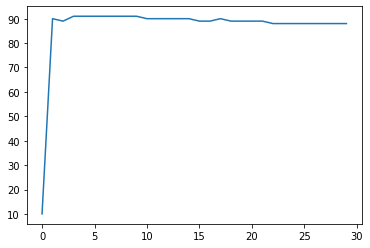

In [12]:
# Your code here
# Print accuracies with K = 1, 3, 7


def distances_matrix_vetorization(X, Y):
    dist =   np.sum(X**2,axis=1) + np.sum(Y**2,axis=1)[:, np.newaxis] -2 * np.dot(Y,X.T)
    return dist

dist_matrix=distances_matrix_vetorization(train_data,test_data)

def KNN(k):
    cnt = np.zeros((1000,10))
    
#     print(dist_matrix.shape)
    for i in range(1000):
        index_sort=np.argsort(dist_matrix[i])
#         print(index_sort)
        for j in range(k):
            label_class=train_labels[index_sort[j]].astype(int)
#             print(label_class)
            cnt[i,label_class]=cnt[i,label_class]+1
    final_res=np.argmax(cnt,1)
    comp=test_labels.astype(int)
    comp= comp-final_res
    [result] = np.where(comp == 0)
    return len(result)/10
print(KNN(1),"%")
print(KNN(3),"%")
print(KNN(7),"%")


y1=np.arange(1,31)

for i in range(30):
    y1[i]=np.absolute(KNN(i))
b=plt.plot(y1)
print()


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
Your analysis here (double click to edit)
1. As seen from the graph the accuracy are not same same for all k, first it increases, decreases and then again increase where it is optimal and from there it goes on decreasing first slowly and then sharply. From this we know that optimal value of k sholud be sufficiently large enough to minimize error due to noisy data points or outliers, but not very large because it may include data points from different-different classes and hence it might lead to a wrong conlusion.

2. The value of k can lies somewhere in between 1 and the size of the class. From the above part one can inferred that the optimal value of k should be large enough to minimize error but not very large to accomate arbitrary points. The value of k can be identified by looking at the accuracy,i.e, the k for the accuracy is maximum out of all possible k-values. A simple algo would be to iterate over k values from 1 to S and select k for which accuracy is maximum. Now the problem reduced to find upper bound on S. Since KNN is an ad-hoc algorithm so finding an least upper-bound (LUB) is difficult. The upper bound of M is $\sqrt{class size}$ which is found empirically. 

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [13]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [14]:
def RNN(k):
    dist_matrix=distances_matrix_vetorization(mixed_data,mixed_data)
    [r,c] = dist_matrix.shape
#     print(r)
    index_sort=np.argsort(dist_matrix,1)
#     print(index_sort)
#     print(index_sort.shape)
    bool_cnt=np.zeros(20)
    
    for i in range(r):
        for j in range(1,k+1):
            bool_cnt[index_sort[i][j]]=1
            
    [result] = np.where(bool_cnt == 0)
    return len(result),result+1
print("(Number of outlies,Outliers)")    
print(RNN(3))

(Number of outlies,Outliers)
(1, array([12]))


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Your algorithm here (double click to edit)

1. First compute the k-nearest neighbours of a test data_point.
2. Take the weighted average of the neatness labels of the k-nearest neighbours where the weights being inversely proportional to the distance between the neighbour and the test data_point multiplied by our prior beilief( uniform in this case) if any.
3. Because the distances are all large, so first I normalize them and take negative exponential of distances as weights.

$$\hat{q_p} = \frac{\sum_{i=1}^{k} w_{q,i}y_i}{\sum_{i=1}^{k} w_{q,i}}$$

---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [15]:
# Your code here
n_train = train_labels/10.0
n_test = test_labels/10.0
#  calucluating distance matrix 
dist_matrix=distances_matrix_vetorization(train_data,test_data) 

def NN_reg(k):
    abs_error = np.zeros(1000)
    for i in range(1000):
        index_sort=np.argsort(dist_matrix[i,:])
        sorted_dist=np.sort(dist_matrix[i,:])
        A = index_sort[:k]
        B= sorted_dist[:k]
        normalize= max(B) - min(B)
        B= (B-min(B))/normalize
        abs_error[i] = np.average(n_train[A],weights = np.exp(B)) - n_test[i]
    return np.mean(np.absolute(abs_error))


print(NN_reg(7))

0.0463728509377893


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---